In [25]:
import pandas as pd
pd.set_option("display.max_columns", None) # for seeing all the columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [26]:
train = pd.read_csv('train.csv')


In [27]:
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [28]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [29]:
X = train.drop('price_range', axis = 1)
y = train.price_range

In [30]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [31]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:xlabel='battery_power'>

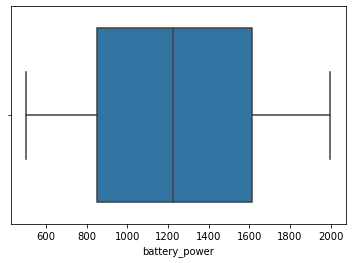

In [32]:
sns.boxplot(X.battery_power)

In [33]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [34]:
bes = SelectKBest(chi2, k = 10)
fi = bes.fit(X,y)


In [35]:
fi.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [36]:
ds = pd.DataFrame({'scores':fi.scores_}, index = X.columns)

In [37]:
ds = ds.nlargest(10, 'scores')

In [38]:
ds

,scores
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124
sc_w,16.480319
talk_time,13.236400
fc,10.135166
sc_h,9.614878


In [39]:
ds.index

Index(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h'],
      dtype='object')

In [40]:
X_new = train[['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h']]
y_new = train.price_range

In [41]:
X_new

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [42]:
y_new

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

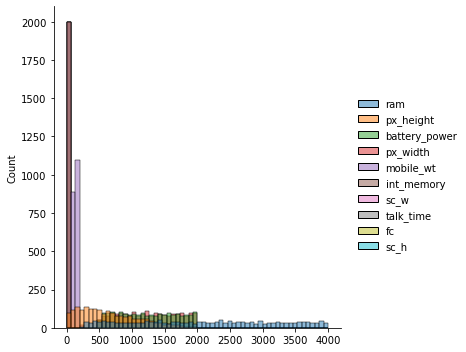

In [43]:
sns.displot(X_new)

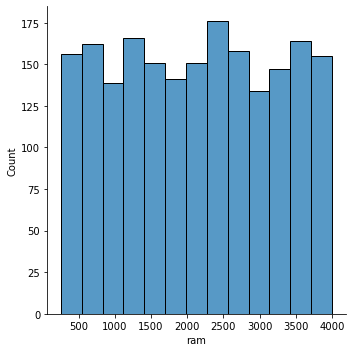

In [44]:
sns.displot(X_new.ram)

In [45]:
def sid(data):
    for d in data:
        print(sns.displot(X_new[d]))
    

In [46]:
X_new.columns

Index(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h'],
      dtype='object')

In [47]:
da = ['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_mem ory', 'sc_w', 'talk_time', 'fc', 'sc_h']

KeyError: 'int_mem ory'

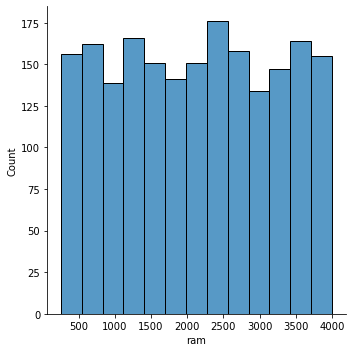

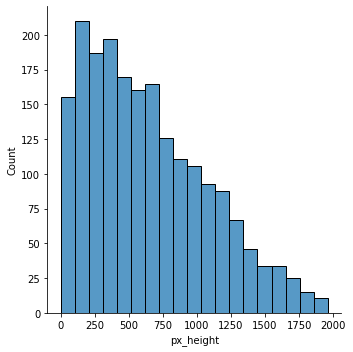

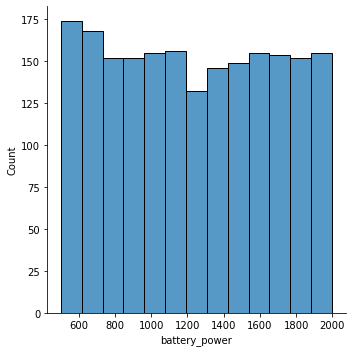

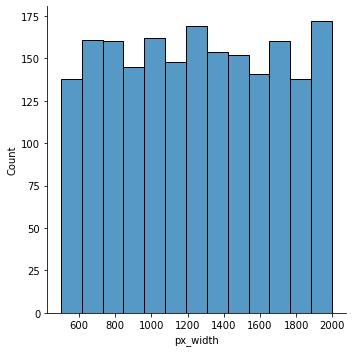

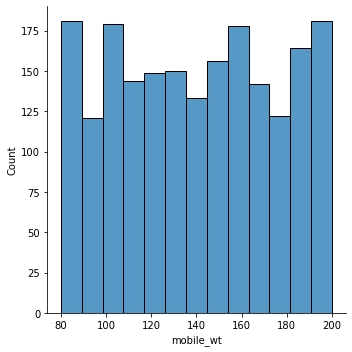

In [48]:
sid(da)

In [ ]:
out(da)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
test = pd.read_csv('test.csv')

In [54]:
test_test = test[['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc', 'sc_h']]



In [56]:
X_train = mi.fit_transform(X_new)
X_test = mi.transform(test_test)

In [57]:
X_train = pd.DataFrame(X_train, columns = X_new.columns)

In [58]:
X_test = pd.DataFrame(X_test, columns = X_new.columns)

In [59]:
X_train

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,0.612774,0.010204,0.227789,0.170895,0.900000,0.080645,0.388889,0.944444,0.052632,0.285714
1,0.634687,0.461735,0.347361,0.993324,0.466667,0.822581,0.166667,0.277778,0.000000,0.857143
2,0.627205,0.644388,0.041416,0.811749,0.541667,0.629032,0.111111,0.388889,0.105263,0.428571
3,0.671566,0.620408,0.076152,0.858478,0.425000,0.129032,0.444444,0.500000,0.000000,0.785714
4,0.308658,0.616327,0.881764,0.475300,0.508333,0.677419,0.111111,0.722222,0.684211,0.214286
...,...,...,...,...,...,...,...,...,...,...
1995,0.110102,0.623469,0.195725,0.927904,0.216667,0.000000,0.222222,0.944444,0.000000,0.571429
1996,0.474613,0.466837,0.977956,0.977971,0.891667,0.596774,0.555556,0.777778,0.000000,0.428571
1997,0.748530,0.442857,0.941884,0.755674,0.233333,0.548387,0.055556,0.166667,0.052632,0.285714
1998,0.163816,0.171429,0.675351,0.113485,0.541667,0.709677,0.555556,0.944444,0.210526,0.928571


In [60]:
X_test

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,0.860502,0.115306,0.362057,0.608812,0.941667,0.048387,0.388889,0.000000,0.736842,0.500000
1,0.972475,0.380612,0.227121,0.238318,0.925000,0.951613,0.000000,0.277778,0.210526,0.071429
2,0.571887,0.647959,0.872411,0.578104,0.883333,0.403226,0.555556,0.444444,0.052632,0.857143
3,0.971940,0.150510,0.698063,0.835781,0.133333,0.370968,0.000000,0.277778,0.947368,0.357143
4,0.405398,0.382143,0.623246,0.206943,0.233333,0.758065,0.444444,0.277778,0.578947,0.714286
...,...,...,...,...,...,...,...,...,...,...
995,0.498397,0.328571,0.800935,0.275701,0.750000,0.838710,0.444444,0.722222,0.000000,0.642857
996,0.448156,0.587755,0.072144,0.755674,0.883333,0.177419,0.055556,0.944444,0.000000,0.214286
997,0.258418,0.243367,0.456914,0.216956,0.000000,0.096774,0.000000,0.666667,0.052632,0.000000
998,0.602084,0.019388,0.689379,0.221629,0.758333,0.774194,0.611111,0.222222,0.000000,0.714286


In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_new)
print(lr.score(X_train, y_new))
pred = lr.predict(X_test)

0.958


In [65]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_new[:1000], pred))
print(accuracy_score(y_new[:1000], pred))
print(classification_report(y_new[:1000], pred))

[[67 55 67 53]
 [62 49 56 67]
 [69 51 61 67]
 [69 62 68 77]]
0.254
              precision    recall  f1-score   support

           0       0.25      0.28      0.26       242
           1       0.23      0.21      0.22       234
           2       0.24      0.25      0.24       248
           3       0.29      0.28      0.29       276

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



<AxesSubplot:xlabel='price_range', ylabel='count'>

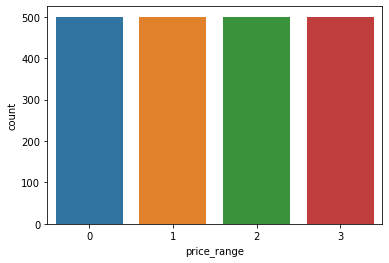

In [66]:
sns.countplot(y_new)

In [70]:
def find(model):
    mod = model.fit(X_train, y_new)
    print('Trainning Score:', mod.score(X_train, y_new))
    pred = mod.predict(X_test)
    #rint(pred)
    print('Confusion Matix:')
    print(confusion_matrix(y_new[:1000], pred))
    print('Accuracy Score:')
    print(accuracy_score(y_new[:1000], pred))
    print('Classification Report:')
    print(classification_report(y_new[:1000], pred))
    

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
find(RandomForestClassifier())

Trainning Score: 1.0
Confusion Matix:
[[61 63 61 57]
 [59 54 56 65]
 [65 57 61 65]
 [72 61 71 72]]
Accuracy Score:
0.248
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.25      0.24       242
           1       0.23      0.23      0.23       234
           2       0.24      0.25      0.25       248
           3       0.28      0.26      0.27       276

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
find(XGBClassifier())

[17:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Trainning Score: 1.0
Confusion Matix:
[[64 58 64 56]
 [60 48 63 63]
 [64 56 63 65]
 [69 63 71 73]]
Accuracy Score:
0.248
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.26      0.26       242
           1       0.21      0.21      0.21       234
           2       0.24      0.25      0.25       248
           3       0.28      0.26      0.27       276

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



In [75]:
from sklearn.model_selection import KFold
kfold = KFold(10)


In [77]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_train, y_new, cv = kfold) 

[17:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [78]:
score.mean() 

0.921

In [79]:
rf = RandomForestClassifier()

In [80]:
score = cross_val_score(rf, X_train, y_new, cv = kfold) 

In [81]:
score.mean()

0.9015000000000001

In [82]:
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 2000, num = 10) ]

# Number of features we consider at very split
max_features = ['auto','sqrt','log2']

# Maximum number of tree in each tree
max_depth = [ int(i) for i in np.linspace(10,1000,10)]

# Minimum number of sample required at each node
min_sample_split = [1,2,3,4,6,8]

# Minimum number of sample required at each leaf
min_sample_leaf = [1,2,4,6,8]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_sample_split,
              'min_samples_leaf': min_sample_leaf,
              'criterion': ['entropy', 'gini']}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, 
                          cv = 3, verbose = 2, random_state = 100, n_jobs = -1)
rf_randomcv.fit(X_train, y_new)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 6, 8],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [85]:
best_params = rf_randomcv.best_estimator_

In [90]:
best_params

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       n_estimators=1788)

In [91]:
score.mean()

0.9015000000000001

In [86]:
y_pred = best_params.predict(X_test)

In [89]:
y_pred.shape

(1000,)

In [87]:
print(confusion_matrix(y_new[:1000], y_pred))
print('Accuracy Score:')
print(accuracy_score(y_new[:1000], y_pred))
print('Classification Report:')
print(classification_report(y_new[:1000], y_pred))
    

[[62 61 63 56]
 [61 51 57 65]
 [64 57 62 65]
 [72 61 69 74]]
Accuracy Score:
0.249
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.26      0.25       242
           1       0.22      0.22      0.22       234
           2       0.25      0.25      0.25       248
           3       0.28      0.27      0.28       276

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000

